**Fonte dati:**
https://github.com/pcm-dpc/COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from aidam.variables_selection import find_non_redundant_subset

## Parametri

In [2]:
data_file='dpc-covid19-ita-regioni-latest.csv'

## Lettura dati e preprocessing

In [3]:
data=pd.read_csv(data_file)

print('Dimensione dati:',data.shape)


selected_columns=['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi','dimessi_guariti',
                  'deceduti', 'totale_casi', 'tamponi']

print('%d selected columns'%len(selected_columns))

data.iloc[:,3:]

Dimensione dati: (21, 18)
9 selected columns


,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,Abruzzo,42.351222,13.398438,280,64,344,516,860,122,23,63,946,5488,NaN,NaN
1,Basilicata,40.639471,15.805148,22,16,38,95,133,21,0,1,134,1046,NaN,NaN
2,P.A. Bolzano,46.499335,11.356624,223,43,266,525,791,43,67,48,906,7744,NaN,NaN
3,Calabria,38.905976,16.594402,101,23,124,248,372,39,7,14,393,5933,NaN,NaN
4,Campania,40.839566,14.250850,448,114,562,607,1169,97,58,83,1310,8346,NaN,NaN
5,Emilia Romagna,44.494367,11.341721,3354,301,3655,5195,8850,594,792,1174,10816,42395,NaN,NaN
6,Friuli Venezia Giulia,45.649435,13.768136,212,54,266,688,954,43,197,72,1223,10721,NaN,NaN
7,Lazio,41.892770,12.483667,878,113,991,844,1835,160,155,106,2096,22771,NaN,NaN
8,Liguria,44.411493,8.932699,998,154,1152,875,2027,201,260,280,2567,7304,NaN,NaN
9,Lombardia,45.466794,9.190347,10681,1263,11944,10245,22189,1598,7839,4861,34889,87713,NaN,NaN


### Analisi di ridondanza

Basata su correlazione lineare fra le variabili

In [18]:
sub_data=data[selected_columns]

uncorrelated_subset,is_correlate= find_non_redundant_subset(sub_data.values,correlation_threshold=0.95,
                                                            pvalue_threshold=0.02,
                                                            iterations=None,
                                                            verbose=True)

[1/9] 3 vertex in dominating set
[2/9] 4 vertex in dominating set
[3/9] 4 vertex in dominating set
[4/9] 3 vertex in dominating set
[5/9] 4 vertex in dominating set
[6/9] 4 vertex in dominating set
[7/9] 4 vertex in dominating set
[8/9] 4 vertex in dominating set
[9/9] 4 vertex in dominating set


array([[ True,  True,  True, False,  True, False, False,  True, False],
       [ True,  True,  True, False,  True, False,  True,  True, False],
       [ True,  True,  True, False,  True, False,  True,  True, False],
       [False, False, False,  True,  True, False,  True,  True, False],
       [ True,  True,  True,  True,  True, False,  True,  True, False],
       [False, False, False, False, False,  True, False, False, False],
       [False,  True,  True,  True,  True, False,  True,  True, False],
       [ True,  True,  True,  True,  True, False,  True,  True, False],
       [False, False, False, False, False, False, False, False,  True]])

[[ True  True  True False  True False False  True False]
 [ True  True  True False  True False  True  True False]
 [ True  True  True False  True False  True  True False]
 [False False False  True  True False  True  True False]
 [ True  True  True  True  True False  True  True False]
 [False False False False False  True False False False]
 [False  True  True  True  True False  True  True False]
 [ True  True  True  True  True False  True  True False]
 [False False False False False False False False  True]]


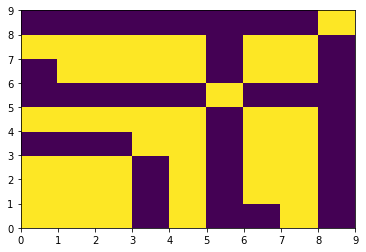

In [20]:
representative_vars=[selected_columns[i] for i in uncorrelated_subset]
representative_vars

## Grafici

### Grafico a barre

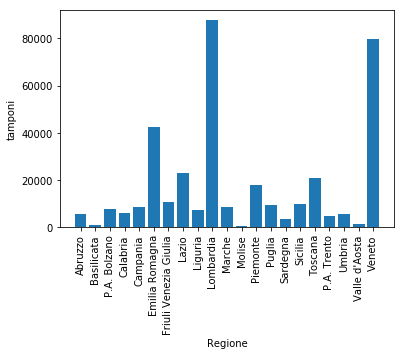

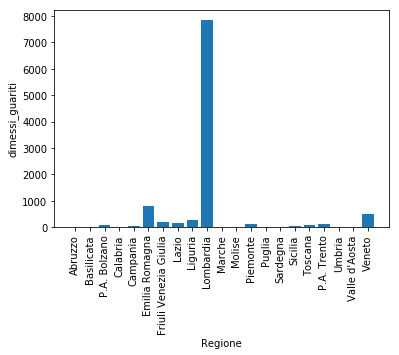

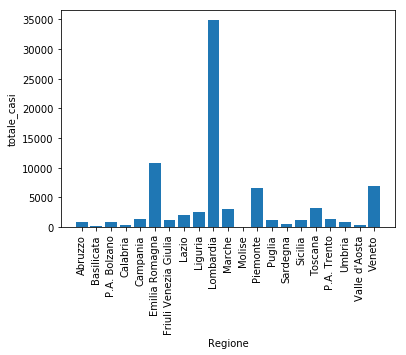

7.461368084794687


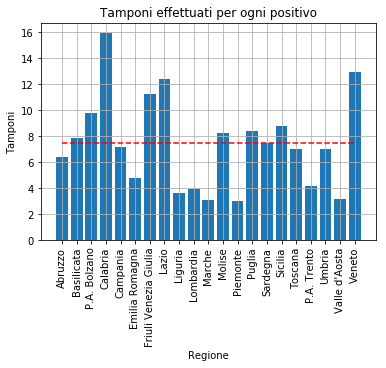

In [22]:
x_pos = np.arange(data.shape[0])


for varname in representative_vars:
    plt.bar(x_pos, data[varname], align='center')
    plt.xticks(x_pos, data['denominazione_regione'],rotation=90)
    plt.ylabel(varname)
    plt.xlabel('Regione')
    plt.show()



media_tamponi_per_positivo=np.nanmean(data['tamponi']/data['totale_attualmente_positivi'])
print(media_tamponi_per_positivo)
plt.bar(x_pos, data['tamponi']/data['totale_attualmente_positivi'], align='center')
plt.xticks(x_pos, data['denominazione_regione'],rotation=90)
plt.ylabel('Tamponi')
plt.xlabel('Regione')
plt.grid()
plt.title('Tamponi effettuati per ogni positivo')
plt.hlines(media_tamponi_per_positivo,xmin=0,xmax=20,colors='r',linestyles='dashed',label='End fit')
plt.show()


## Relazione fra le varie misure

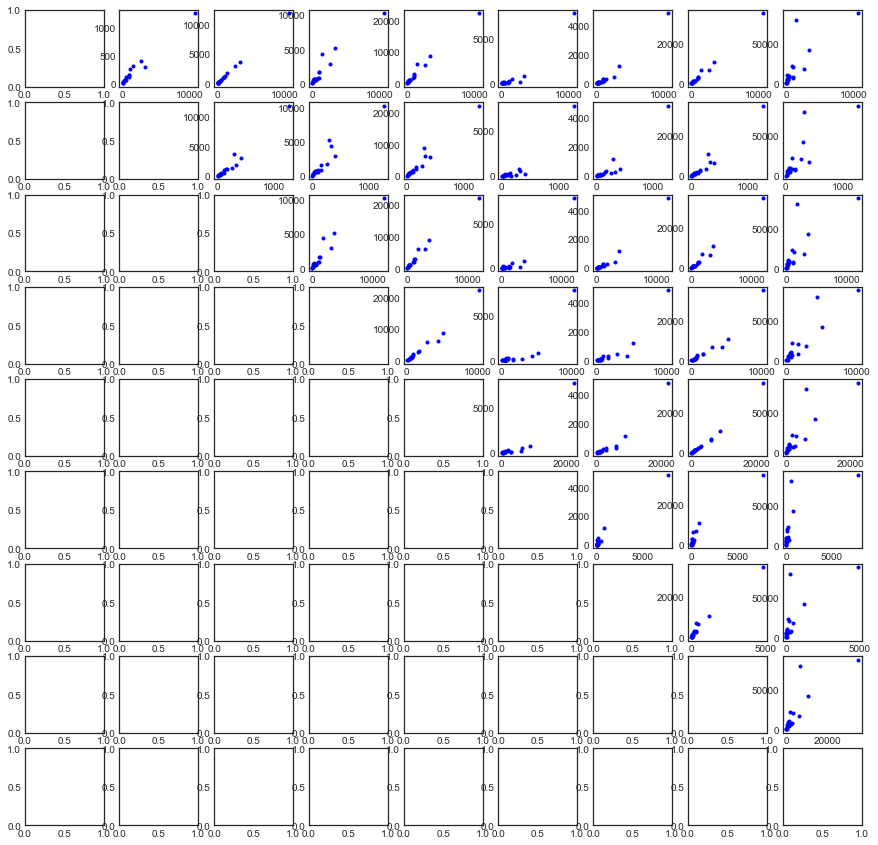

In [44]:
fig,ax=plt.subplots(len(selected_columns),len(selected_columns),figsize=(15,15))


for r,cx in enumerate(selected_columns):
    for c,cy in enumerate(selected_columns):
        if c>r:
            ax[r,c].plot(data[cx],data[cy],'b.')




In [38]:
len(ax)

9